In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt

In [39]:
def cost_function_torch(param):
    return (param - 3)**2
    #implementing NAG from scratch for a simple example: minimizing a quadratic function J(x)=(x−3)^2

In [40]:
class NAGOptimizer:
    def __init__(self, initial_param, learning_rate, momentum_coeff):
        self.param = torch.tensor(initial_param, requires_grad=True)
        self.lr = learning_rate
        self.momentum_coeff = momentum_coeff
        self.velocity = torch.tensor(0.0)
    
    def step(self):
        x_ahead_val = self.param.detach() - self.momentum_coeff * self.velocity.detach()
        x_ahead = torch.tensor(x_ahead_val.item(), requires_grad=True)

        cost_at_x_ahead = cost_function_torch(x_ahead)

        cost_at_x_ahead.backward()
        grad_at_x_ahead = x_ahead.grad

        self.velocity = self.momentum_coeff * self.velocity + self.lr * grad_at_x_ahead       
        with torch.no_grad():
            self.param.data -= self.velocity
    
    def get_param(self):
        return self.param.item()


In [41]:
def run_optimization(optimizer, num_iterations):
    x_history = [optimizer.get_param()]
    cost_history = [cost_function_torch(optimizer.param).item()]

    for i in range(num_iterations):
        optimizer.step()
        x_history.append(optimizer.get_param())
        cost_history.append(cost_function_torch(optimizer.param).item())
    
    return x_history, cost_history

In [42]:
def run_optimization(optimizer, num_iterations):
    x_history = [optimizer.get_param()]
    cost_history = [cost_function_torch(optimizer.param).item()]

    for i in range(num_iterations):
        optimizer.step()
        x_history.append(optimizer.get_param())
        cost_history.append(cost_function_torch(optimizer.param).item())
    
    return x_history, cost_history

In [43]:
def visualize_results(x_history, cost_history, title="Nesterov Accelerated Gradient (NAG)"):
    x_plot = np.linspace(0, 6, 100)
    y_plot = (x_plot - 3)**2

    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, label='Cost Function')
    plt.plot(x_history, cost_history, marker='o', linestyle='--', color='green', label='NAG Path')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.show()

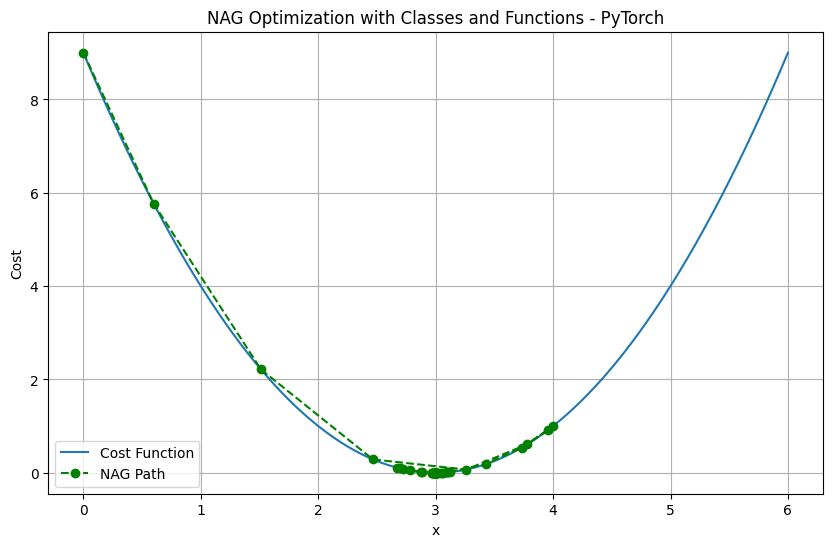

Final x value: 3.0005
Final cost: 0.0000


In [44]:
def main():
    initial_x = 0.0
    learning_rate = 0.1
    momentum_coeff = 0.9
    num_iterations = 50

    optimizer = NAGOptimizer(initial_x, learning_rate, momentum_coeff)

    x_history, cost_history = run_optimization(optimizer, num_iterations)

    visualize_results(x_history, cost_history, "NAG Optimization with Classes and Functions - PyTorch")

    print(f"Final x value: {x_history[-1]:.4f}")
    print(f"Final cost: {cost_history[-1]:.4f}")

if __name__ == "__main__":
    main()